# SDynPy Showcase

This document will demonstrate the Structural Dynamics capabilities in SDynPy,
from the basics such as computing mode shapes, to complex analyses such as
substructuring.

## Imports

In order to use SDynPy, we will need to import it into our Python script.  We
will alias ``sdynpy`` as ``sdpy`` to make it somewhat shorter to type.

We will also import ``numpy`` and ``matplotlib`` for numerics and 2D plotting,
respectively. 



In [1]:
import sdynpy as sdpy           # For Structural Dynamics
import numpy as np              # For Numerics
import matplotlib.pyplot as plt # For 2D Plotting

## Creating a Simple Beam Model

In structural dynamics, beams are the classic academic structure, so we will
start with one here.  We will create a beam using the
[`sdpy.System.beam`](xref:api#sdynpy.core.sdynpy_system.System.beam) class method,
which returns a
[`System`](xref:api#sdynpy.core.sdynpy_system.System) object as well as a 
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object representing the
beam.  The beam will be 20 cm x 1 cm x 0.5 cm and made out of steel.

In [2]:
system,geometry = sdpy.System.beam(
    length = 0.2, # Meters
    width = 0.01, # Meters
    height = 0.005, # Meters
    num_nodes = 21,
    material='steel')

## Geometry in SDynPy

We will first explore the 
[`geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object that was
created by the previous method.  Typing ``geometry`` into the Python console
after running the previous method will print a representation of the geometry
object.

In [3]:
geometry

Node
   Index,     ID,        X,        Y,        Z, DefCS, DisCS
    (0,),      1,    0.000,    0.000,    0.000,     1,     1
    (1,),      2,    0.010,    0.000,    0.000,     1,     1
    (2,),      3,    0.020,    0.000,    0.000,     1,     1
    (3,),      4,    0.030,    0.000,    0.000,     1,     1
    (4,),      5,    0.040,    0.000,    0.000,     1,     1
    (5,),      6,    0.050,    0.000,    0.000,     1,     1
    (6,),      7,    0.060,    0.000,    0.000,     1,     1
    (7,),      8,    0.070,    0.000,    0.000,     1,     1
    (8,),      9,    0.080,    0.000,    0.000,     1,     1
    (9,),     10,    0.090,    0.000,    0.000,     1,     1
   (10,),     11,    0.100,    0.000,    0.000,     1,     1
   (11,),     12,    0.110,    0.000,    0.000,     1,     1
   (12,),     13,    0.120,    0.000,    0.000,     1,     1
   (13,),     14,    0.130,    0.000,    0.000,     1,     1
   (14,),     15,    0.140,    0.000,    0.000,     1,     1
   (15,),     16,  

Here we see there are four "sections" of a
[`geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object.  These are

   1. Nodes -- define the positions of points in space as well as assigning coordinate systems to those points in space
   2. Coordinate Systems -- define various coordinate systems in the model, which could be used for defining node positions or defining the displacement directions of nodes
   3. Tracelines -- define 1D connections between nodes that are used to aid in visualizing the geometry
   4. Elements -- define 2D or 3D connections between nodes that are used to aid in visualizing the geometry.
       
The present ``geometry`` has 21 nodes, 1 coordinate system, 1 traceline
containing 21 nodes, and no elements.  We can access the different sections of
the geometry by accessing the ``node``, ``coordinate_system``, ``traceline``,
or ``element`` attributes of the object, for example:


In [4]:
geometry.node

   Index,     ID,        X,        Y,        Z, DefCS, DisCS
    (0,),      1,    0.000,    0.000,    0.000,     1,     1
    (1,),      2,    0.010,    0.000,    0.000,     1,     1
    (2,),      3,    0.020,    0.000,    0.000,     1,     1
    (3,),      4,    0.030,    0.000,    0.000,     1,     1
    (4,),      5,    0.040,    0.000,    0.000,     1,     1
    (5,),      6,    0.050,    0.000,    0.000,     1,     1
    (6,),      7,    0.060,    0.000,    0.000,     1,     1
    (7,),      8,    0.070,    0.000,    0.000,     1,     1
    (8,),      9,    0.080,    0.000,    0.000,     1,     1
    (9,),     10,    0.090,    0.000,    0.000,     1,     1
   (10,),     11,    0.100,    0.000,    0.000,     1,     1
   (11,),     12,    0.110,    0.000,    0.000,     1,     1
   (12,),     13,    0.120,    0.000,    0.000,     1,     1
   (13,),     14,    0.130,    0.000,    0.000,     1,     1
   (14,),     15,    0.140,    0.000,    0.000,     1,     1
   (15,),     16,    0.1

### Nodes

We will start by exploring the nodes of the geometry, which are stored as a
[`NodeArray`](xref:api#sdynpy.core.sdynpy_geometry.NodeArray) object revealed by
``geometry.node``.  The
[`NodeArray`](xref:api#sdynpy.core.sdynpy_geometry.NodeArray) class is a subclass of
[`SdynpyArray`](xref:api#sdynpy.core.sdynpy_array.SdynpyArray), which is
itself a subclass of NumPy's
[`ndarray`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).
All subclasses of [`SdynpyArray`](xref:api#sdynpy.core.sdynpy_array.SdynpyArray)
can therefore take advantage of NumPy functions such as ``intersect1d``,
``unique``, or ``concatenate`` and also handle indexing and broadcasting
identically to the NumPy ``ndarray``.

Subclasses of [`SdynpyArray`](xref:api#sdynpy.core.sdynpy_array.SdynpyArray)
store their data internally as a structured array variant of the ``ndarray``.
This allows multiple data fields to be stored within each entry of the array.
For example, the above has 21 nodes, and each node has an identification number,
a position in space, and other information defined information defined.
However, as an alternative to accessing the field data using the syntax
``array['fieldname']``, 
[`SdynpyArray`](xref:api#sdynpy.core.sdynpy_array.SdynpyArray) allows accessing
the fields as if they were attributes using the syntax ``array.fieldname``.
Many integrated development environments will not recognize these added attributes
so all [`SdynpyArray`](xref:api#sdynpy.core.sdynpy_array.SdynpyArray) subclasses
have a [`fields`](xref:api#sdynpy.core.sdynpy_array.SdynpyArray.fields) 
attribute that lists the fields stored in the array that can be accessed.

Returning to the
[`geometry.node`](xref:api#sdynpy.core.sdynpy_geometry.NodeArray), we can
identify the fields in the object using the command

In [5]:
geometry.node.fields

('id', 'coordinate', 'color', 'def_cs', 'disp_cs')

Here we see the five fields of the
[`NodeArray`](xref:api#sdynpy.core.sdynpy_geometry.NodeArray) object.  We can
obtain even more information about the shape and type of each of these fields
using the ``dtype`` attribute, which is inherited from NumPy's ``ndarray``.

In [6]:
geometry.node.dtype

dtype([('id', '<u8'), ('coordinate', '<f8', (3,)), ('color', '<u2'), ('def_cs', '<u8'), ('disp_cs', '<u8')])

Here we see that the ``geometry.node.id`` array, which contains the node ID
number, is a 8-byte (64-bit) unsigned integer.  The ``geometry.node.disp_cs``
and ``geometry.node.def_cs`` arrays, which contain references to the
coordinate system in which the node is defined and in which the node
displaces, respectively, are also this data type.  The ``geometry.node.color``
array, while still an unsigned integer, is only 2 bytes, or 16 bits.  Finally,
the ``geometry.node.coordinate``, which contains the 3D position of the node
as defined in the ``geometry.node.def_cs`` coordinate system, consists of 
8-byte (64-bit)
floating-point data, and also has a shape of ``(3,)``, which signifies there
are three values of the coordinate for each entry in the ``geometry.node``
array.  These extra dimensions of the field arrays are appended at the end of
dimension of the [`SdynpyArray`](xref:api#sdynpy.core.sdynpy_array.SdynpyArray)
subclass.  For example, if we compare the shape of the ``geometry.node`` array
to the ``geometry.node.coordinate`` array, we will see that the shapes are
identical except for the appending of the length-3 extra dimension on the
latter array.  Here the ``shape`` attribute is also an attribute inherited
from NumPy's ``ndarray``.

In [7]:
geometry.node.shape

(21,)

In [8]:
geometry.node.coordinate.shape

(21, 3)

We see that the shape of our ``geometry.node`` array is 21, meaning the
geometry we are examining has that many nodes.  We then see that the shape of
our ``geometry.node.coordinate`` array is 21 x 3, showing that there are
three coordinate values for each of the 21 nodes.

### Coordinate Systems

Coordinate systems in the
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object are stored
in a 
[`CoordinateSystemArray`](xref:api#sdynpy.core.sdynpy_geometry.CoordinateSystemArray)
object that can be accessed by ``geometry.coordinate_system``.  We will again
explore the fields of the 
[`CoordinateSystemArray`](xref:api#sdynpy.core.sdynpy_geometry.CoordinateSystemArray)
using the ``dtype``.

In [9]:
geometry.coordinate_system.dtype

dtype([('id', '<u8'), ('name', '<U40'), ('color', '<u2'), ('cs_type', '<u2'), ('matrix', '<f8', (4, 3))])

We now see some new types of fields.  We still have ``id`` and ``color``,
which are consistent with the 
[`NodeArray`](xref:api#sdynpy.core.sdynpy_geometry.NodeArray) object we
previously explored.  We now have another integer field ``cs_type`` which
stores the type of coordinate system (0 - cartesian, 1 - cylindrical, 
2 - spherical) in a 16-bit unsigned integer field.  We also have a ``name``
field, which stores a name of the coordinate system in a string of less than
40 characters.  Finally, there is the coordinate system's transformation matrix,
stored in the ``matrix`` field, which is stored in a 4 x 3 array of 64-bit
floating point numbers.  Again, recall the shape of the fields are appended to
the shape of the base object, so comparing the shape of the
[`CoordinateSystemArray`](xref:api#sdynpy.core.sdynpy_geometry.CoordinateSystemArray)
to the shape of its ``matrix`` field, we will see that the latter has 2 extra
dimensions of length 4 and 3.

In [10]:
geometry.coordinate_system.shape

(1,)

In [11]:
geometry.coordinate_system.matrix.shape

(1, 4, 3)

In SDynPy, the upper 3 rows of the
[`CoordinateSystemArray`'s](xref:api#sdynpy.core.sdynpy_geometry.CoordinateSystemArray)
``matrix`` field represent a rotation matrix, whereas the last row represents a
translation vector.  The translation vector specifies the origin of the
coordinate system, and the rows of the rotation matrix represent the local
coordinate system directions.

### Elements

Elements in the 
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) are stored in an
[`ElementArray`](xref:api#sdynpy.core.sdynpy_geometry.ElementArray) object, which
can be accessed using the ``geometry.element`` attribute.  The fields of this
object are

In [12]:
geometry.element.dtype

dtype([('id', '<u8'), ('type', 'u1'), ('color', '<u2'), ('connectivity', 'O')])

Like [`NodeArray`](xref:api#sdynpy.core.sdynpy_geometry.NodeArray) and
[`CoordinateSystemArray`](xref:api#sdynpy.core.sdynpy_geometry.CoordinateSystemArray)
objects, the [`ElementArray`](xref:api#sdynpy.core.sdynpy_geometry.ElementArray)
object also has ``id`` and ``color`` fields.  Each element also has a ``type``
field, which is an 8-bit unsigned integer representing the element type as
defined by the universal file format dataset 2412.  Finally, the element
``connectivity`` field is stored as an object array, where each entry in the
element array is a NumPy ``ndarray`` with length equal to the number of nodes
in the element.  This construction is necessary as each element might have a
different number of nodes, so a single array of fixed size is not possible.

The current geometry has no elements associated with it, so if we compute its
shape, we will find that it has length zero.

In [13]:
geometry.element.shape

(0,)

### Tracelines

The final visualization tool in the
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object is the
[`TracelineArray`](xref:api#sdynpy.core.sdynpy_geometry.TracelineArray),
which represents a line connecting nodes in the geometry.  The fields of the
[`TracelineArray`](xref:api#sdynpy.core.sdynpy_geometry.TracelineArray) object
are

In [14]:
geometry.traceline.dtype

dtype([('id', '<u8'), ('color', '<u2'), ('description', '<U40'), ('connectivity', 'O')])

Similarly to the other geometry objects, 
[`TracelineArray`](xref:api#sdynpy.core.sdynpy_geometry.TracelineArray) objects
have ``id`` and ``color``, and like the 
[`ElementArray`](xref:api#sdynpy.core.sdynpy_geometry.ElementArray) object, it
has a ``connectivity`` array that specifies the node IDs to connect with a
line.  The ``description`` field stores a name or description of each item in
the [`TracelineArray`](xref:api#sdynpy.core.sdynpy_geometry.TracelineArray) as
a string with less than 40 characters.

The present geometry has single traceline that connects all of the nodes in the
model.  Note that due to how object arrays are used in NumPy, investigating the
shape of the ``connectivity`` field will not immediately tell the user how many
nodes are in each connectivity array, but will rather just return the shape of
the [`TracelineArray`](xref:api#sdynpy.core.sdynpy_geometry.TracelineArray)
itself (note the dtype definition previously, where the ``connectivity`` field
has no additional shape associated with it).  However, if we actually index into
a single connectivity array, we can then see how big it is.

In [15]:
geometry.traceline.connectivity.shape

(1,)

In [16]:
geometry.traceline.connectivity[0].shape

(21,)

The entries in the connectivity array will determine how the nodes are
connected.  We see here that the traceline connects each node together from 1
to 21.  Note that a ``0`` entry in a traceline array is equivalent to a line
break; the line will stop at the previous node and resume at the next node,
leaving a gap.  Discontinuous lines may also be constructed using multiple
tracelines.

In [17]:
geometry.traceline.connectivity[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=uint32)

### Plotting Geometry

While it can be illustrative to examine the underlying data in a
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object, the more
intuitive view is gained by plotting the
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object.  SDynPy can
produce a 3D interactive representation of the
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object by calling its
[`plot`](xref:api#sdynpy.core.sdynpy_geometry.Geometry.plot) method.

In [18]:
geometry.plot();

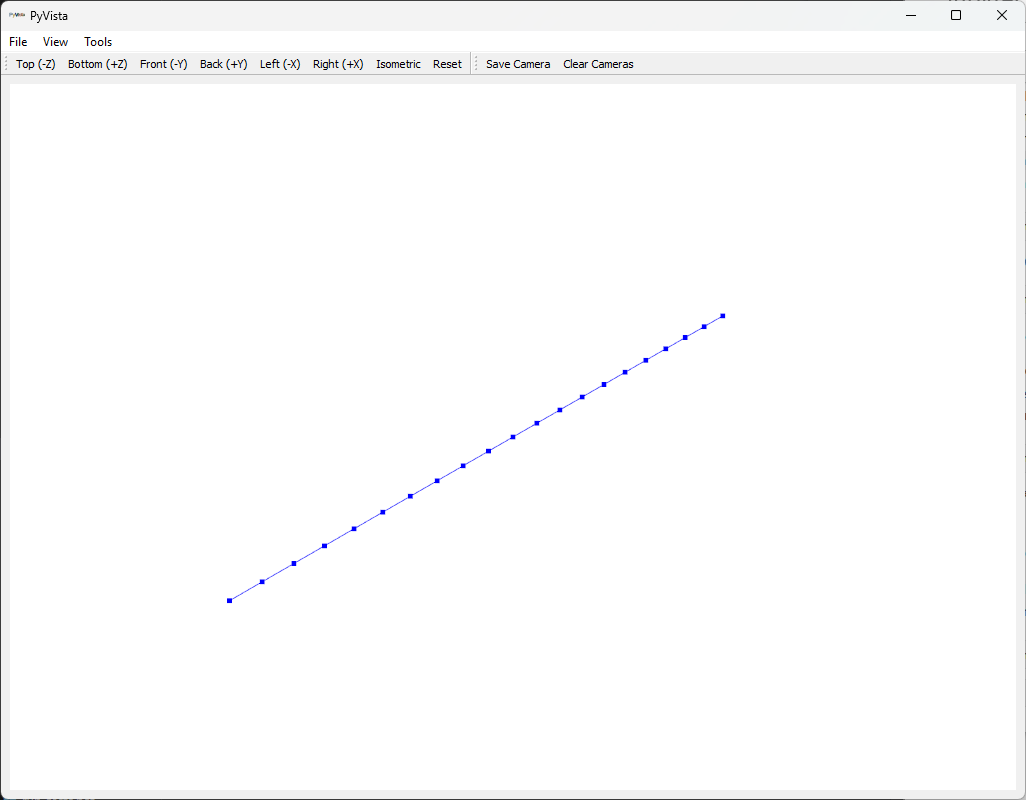

## Systems in SDynPy

The [`System`](xref:api#sdynpy.core.sdynpy_system.System) object is designed to
store the mass, stiffness, and damping matrices associated with a dynamic
system.  These are stored in the ``mass``, ``stiffness``, and ``damping``
attributes of the [`System`](xref:api#sdynpy.core.sdynpy_system.System) object.

Typing ``system`` into the into the Python console will report the number of
the degrees of freedom in the system.

In [19]:
system

System with 126 DoFs (126 internal DoFs)

We can plot the system matrices to see the element connectivity.  Each matrix
should have numbers of rows and columns equal to the reported number of internal
degrees of freedom, which will be 126 for this 

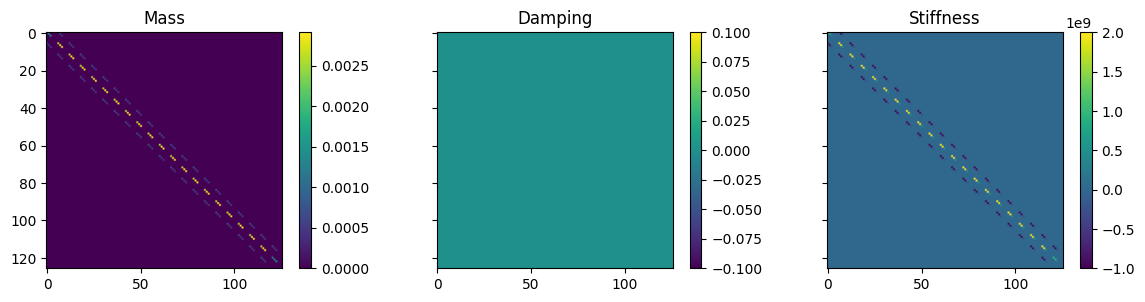

In [20]:
# Create the figure and axes
fig,ax = plt.subplots(1,3,sharex=True,sharey=True,num='System Matrices',
                        figsize=(12,3))
# Plot the matrices
mimg = ax[0].imshow(system.mass)
dimg = ax[1].imshow(system.damping)
simg = ax[2].imshow(system.stiffness)
# Add colorbar
plt.colorbar(mimg,ax=ax[0])
plt.colorbar(dimg,ax=ax[1])
plt.colorbar(simg,ax=ax[2])
# Label each plot
ax[0].set_title('Mass')
ax[1].set_title('Damping')
ax[2].set_title('Stiffness')
# Set to tight layout
fig.tight_layout()

Note that due to the system deriving from a finite element model, the damping
is zero.

In addition to the ``mass``, ``stiffness``, and ``damping`` matrices, SDynPy
[`System`](xref:api#sdynpy.core.sdynpy_system.System) objects also track
transformations between internal state degrees of freedom, as well as which
degrees of freedom are associated with rows and columns of the matrices.

For the current ``system`` object, the transformation, accessed using the 
``system.transformation`` attribute, is the identity matrix.
This is because the system matrices are already represented in physical
coordinates.


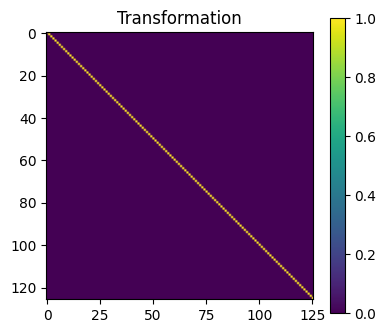

In [21]:
# Create the figure and axes
fig,ax = plt.subplots(1,1,sharex=True,sharey=True,num='System Transformation',
                        figsize=(4,3.5))
# Plot the matrices
timg = ax.imshow(system.transformation)
# Add colorbar
plt.colorbar(timg,ax=ax)
# Label each plot
ax.set_title('Transformation')
# Set to tight layout
fig.tight_layout()

The degrees of freedom corresponding to the rows and columns of the system
matrices can be accessed using the ``system.coordinate`` attribute.  This
provides a [`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
object containing the degrees of freedom (node and local direction).

In [22]:
system.coordinate

coordinate_array(string_array=
array(['1X+', '1Y+', '1Z+', '1RX+', '1RY+', '1RZ+', '2X+', '2Y+', '2Z+',
       '2RX+', '2RY+', '2RZ+', '3X+', '3Y+', '3Z+', '3RX+', '3RY+',
       '3RZ+', '4X+', '4Y+', '4Z+', '4RX+', '4RY+', '4RZ+', '5X+', '5Y+',
       '5Z+', '5RX+', '5RY+', '5RZ+', '6X+', '6Y+', '6Z+', '6RX+', '6RY+',
       '6RZ+', '7X+', '7Y+', '7Z+', '7RX+', '7RY+', '7RZ+', '8X+', '8Y+',
       '8Z+', '8RX+', '8RY+', '8RZ+', '9X+', '9Y+', '9Z+', '9RX+', '9RY+',
       '9RZ+', '10X+', '10Y+', '10Z+', '10RX+', '10RY+', '10RZ+', '11X+',
       '11Y+', '11Z+', '11RX+', '11RY+', '11RZ+', '12X+', '12Y+', '12Z+',
       '12RX+', '12RY+', '12RZ+', '13X+', '13Y+', '13Z+', '13RX+',
       '13RY+', '13RZ+', '14X+', '14Y+', '14Z+', '14RX+', '14RY+',
       '14RZ+', '15X+', '15Y+', '15Z+', '15RX+', '15RY+', '15RZ+', '16X+',
       '16Y+', '16Z+', '16RX+', '16RY+', '16RZ+', '17X+', '17Y+', '17Z+',
       '17RX+', '17RY+', '17RZ+', '18X+', '18Y+', '18Z+', '18RX+',
       '18RY+', '18RZ+', '19X+',

### Coordinates

Here again is a good place to explore what makes up a
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
object.  We can examine the data type of the 
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
to see that it contains fields for a 64-bit unsigned integer as the ``node``
field and an 8-bit signed integer for the ``direction`` field. 

.. code-block:: console

    In [18]: system.coordinate.dtype
    Out[18]: dtype([('node', '<u8'), ('direction', 'i1')])
    
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
objects store the direction as an integer with encoding:


|Direction   | Integer Encoding |
|------------|------------------|
|    X+      |        1         |
|    Y+      |        2         |
|    Z+      |        3         |
|    RX+     |        4         |
|    RY+     |        5         |
|    RZ+     |        6         |
|    X-      |       -1         |
|    Y-      |       -2         |
|    Z-      |       -3         |
|    RX-     |       -4         |
|    RY-     |       -5         |
|    RZ-     |       -6         |
|    None    |        0         |

Note that the directions with ``R`` are rotations about the respective axis.

When we want to examine
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
objects, the integer directions are typically transformed into the more
readable direction strings shown in the first column of the above table.  For
example, if we type a
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray) object
into the console, the representation of the
object displays the string array version of the coordinates, as shown above.
      
From the above, we can see that the
[`System`](xref:api#sdynpy.core.sdynpy_system.System) we just created
contains a degree of freedom for each of the positive X, Y, Z translations and
each of the positive X, Y, Z rotations each node.

Many SDynPy objects allow indexing with a
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
object to automatically handle the bookkeeping aspect of selecting the right
data for each coordinate.

### Plotting Coordinates

At this point, we would like to plot our coordinates on top of our geometry.
For this we use the 
[`plot_coordinate`](xref:api#sdynpy.core.sdynpy_geometry.Geometry.plot_coordinate)
method of the [`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object.


In [23]:
geometry.plot_coordinate(system.coordinate,arrow_scale=0.02)

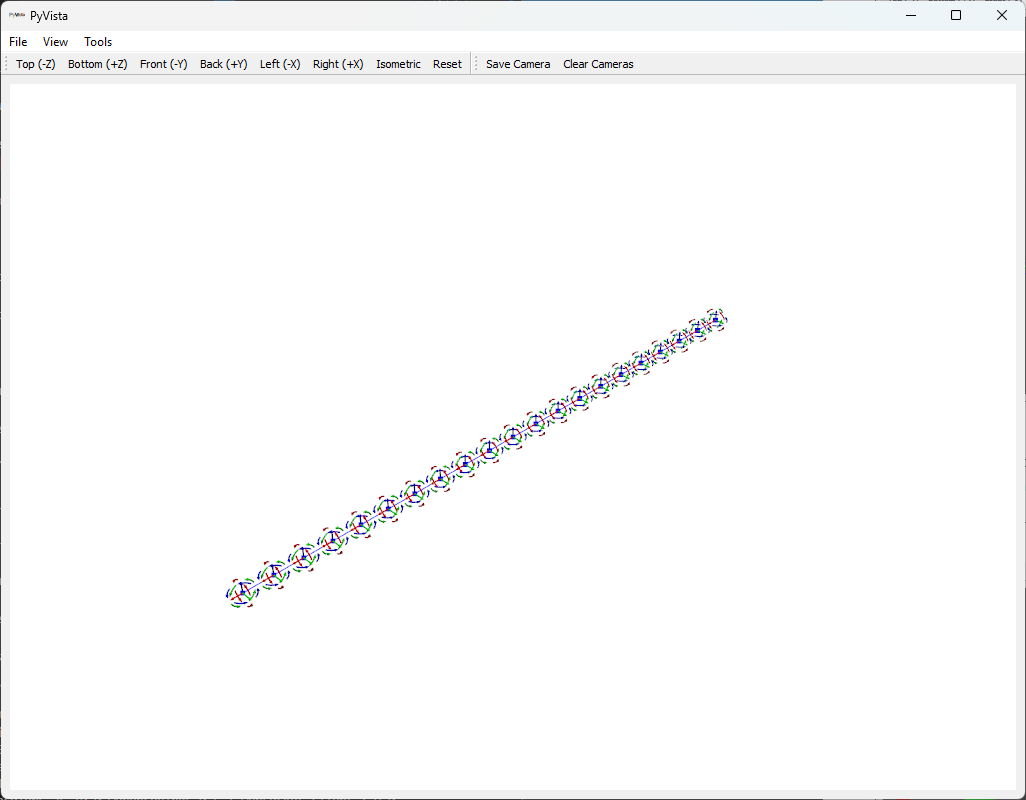

Note that due to the density of the mesh, we had to make the ``arrow_scale``
smaller than the default, otherwise the arrows would overlap.

If we zoom into the coordinate systems on the figure, we see more clearly that
there are rotations and translations defined at each node.

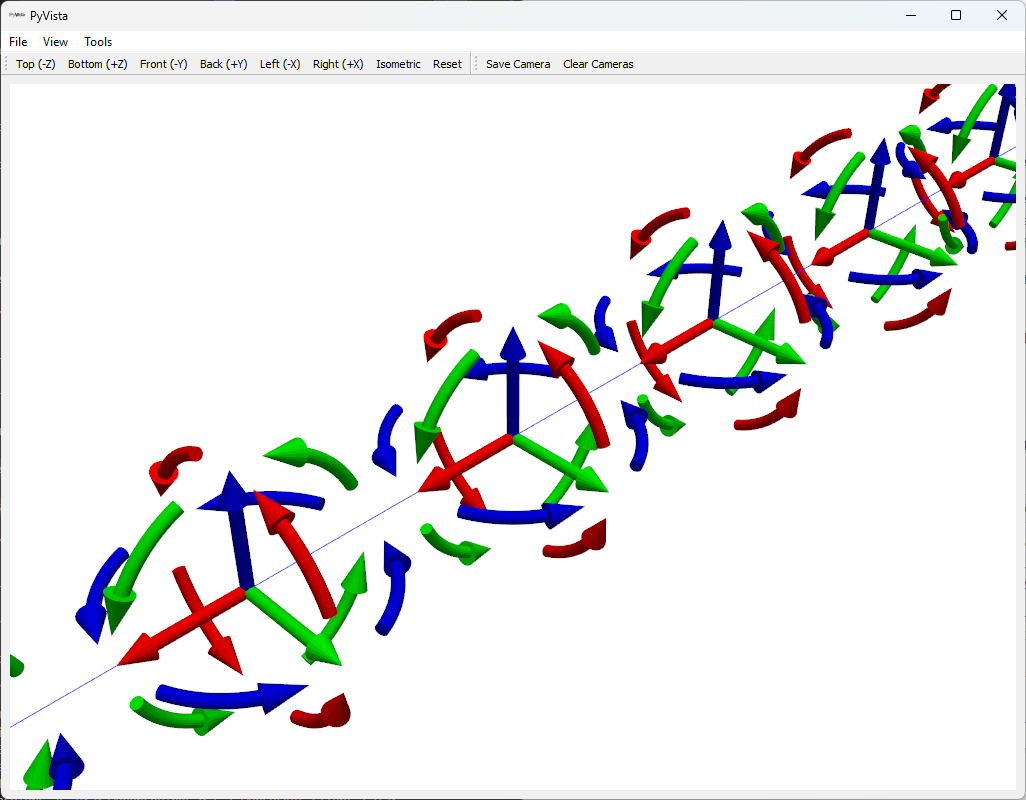

## Computing Modes of the System

With mass, stiffness, and damping matrices, there are several types of
structural dynamics analyses that could be performed.  One popular analysis
that is performed in structural dynamics is modal analysis.  In this type of
analysis, we will compute the 
`Generalized Eigensolution <modal_tutorials/Modal_04_Modal_Analysis/Modal_04_Modal_Analysis.html#Solving-for-the-Eigenvalues>`_
of the mass and stiffness matrices.  While we could extract these matrices from
the [`System`](xref:api#sdynpy.core.sdynpy_system.System) object and perform
the eigensolution using a linear algebra package such as that in SciPy, we can
instead use the [`System.eigensolution`](xref:api#sdynpy.core.sdynpy_system.System.eigensolution)
method to compute the modes and handle all of the bookkeeping.  This method
accepts arguments to determine which modes to compute.  For example, we can
easily compute all modes below a certain frequency (say 4000 Hz).

In [24]:
shapes = system.eigensolution(maximum_frequency=4000)

This produces a [`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray)
object, which is used by SDynPy to represent mode shapes and deflection shapes.

We can type the variable name ``shapes`` into the Python console to see more
information about the mode shapes.

In [25]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0153,    0.0000%,        126
    (5,),     0.0153,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

Here we see there were 11 modes below 4000 Hz.  6 of the modes are rigid body
modes, with natural frequency of approximately 0 Hz.  5 of the modes are elastic
modes.  Each of the modes has 0% damping (due to the damping matrix being equal
to the zero matrix), and each mode has 126 degrees of freedom.

### Shapes

At this point, it is useful to explore briefly the
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) object in the
Python console.  The data type of the object is:

In [26]:
shapes.dtype

dtype([('frequency', '<f8'), ('damping', '<f8'), ('coordinate', [('node', '<u8'), ('direction', 'i1')], (126,)), ('shape_matrix', '<f8', (126,)), ('modal_mass', '<f8'), ('comment1', '<U80'), ('comment2', '<U80'), ('comment3', '<U80'), ('comment4', '<U80'), ('comment5', '<U80')])

The data type of 
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) objects can change
depending on what type of shape and how many degrees of freedom are in the
shape.  ``frequency`` and ``damping`` fields are stored as 64-bit floating
point numbers with one value per entry in the 
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray).  ``modal_mass``
is also stored in the present
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray), but if the shape
is complex, then the modal mass might also be complex.  The ``shape_matrix``
field holds the underlying shape data.  It has one entry for every degree of
freedom in the shape, and is represented by a floating point number for
normal modes or a complex number for complex modes.  Similarly, the
``coordinate`` field identifies which degree of freedom belongs to which entry
in the ``shape_matrix`` field.  The ``coordinate`` field stores data as
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
objects, and thus has the same data type as
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray).
Finally, there are five fields available for comments, which store string data
up to 80 characters which can be used to store any data the user feels is
relevant to the analysis.

One thing to note is that the ``shape_matrix`` field, due to the dimension of
the field being appended at the end of the array, will be transposed from the
typical representation of a mode shape matrix (degrees of freedom as rows and
mode indices as columns). The ``shape_matrix`` field will instead have the
shape of the [`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray)
object itself as its first dimensions, and then the size of the ``coordinate``
field as its last dimension.

In [27]:
shapes.shape

(11,)

In [28]:
shapes.shape_matrix.shape

(11, 126)

To access the mode shape matrix in a more familiar format, users can instead
access the ``modeshape`` attribute of the
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) object.  This will
be identical data to the ``shape_matrix`` field, except it will have the last
two dimensions of the array transposed.  For a 1D array of shapes, this will
produce a modeshape matrix with degrees of freedom indices as the rows of the
matrix and mode indices as the columns of the matrix.

In [29]:
shapes.modeshape.shape

(126, 11)

### Plotting Shapes

While it may be useful to access the raw mode shape data in matrix form, the most
intutive view of the shapes is often obtained when the shapes are plotted on
the geometry.  This is easily done in SDynPy by using the
[`plot_shape`](xref:api#sdynpy.core.sdynpy_geometry.Geometry.plot_shape) method of the
[`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object, and passing
the [`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) object as the
argument.

In [30]:
geometry.plot_shape(shapes)

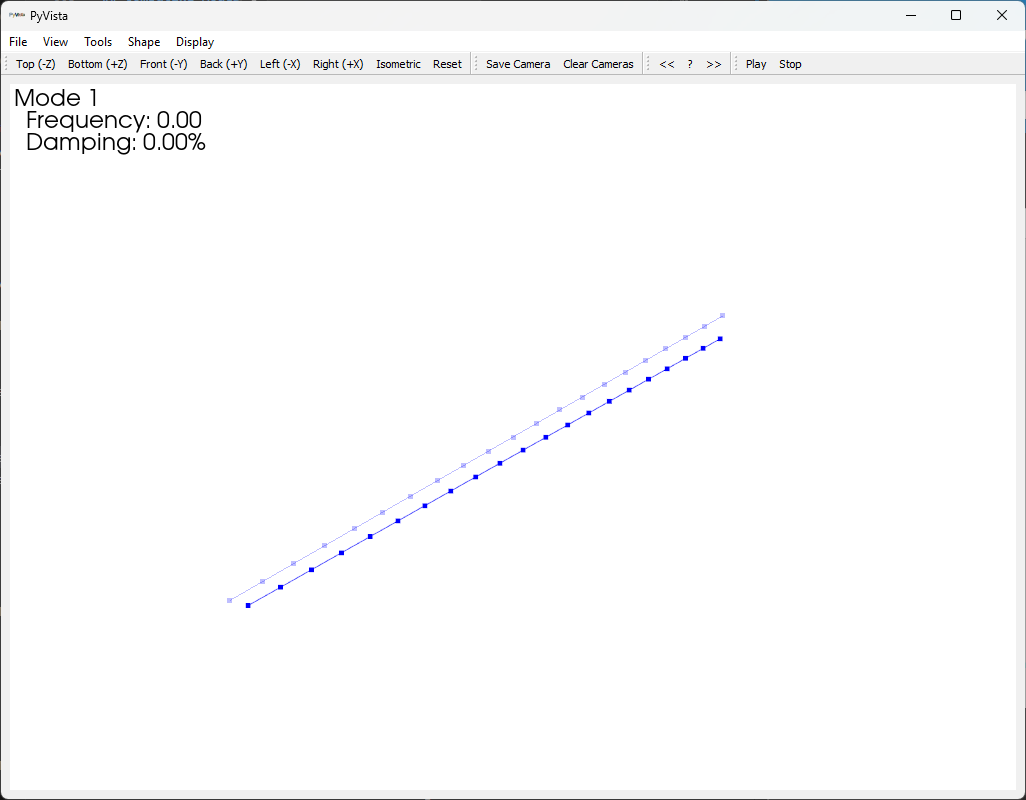

The Shape Plotter window is an interactive, animated 3D plot that allows users
to visualize the mode shapes of the system.  We will briefly highlight some of
the key features of this tool.

The ``File`` menu contains tools for saving images from the window.  The 
``Take Screenshot`` action allows saving an image of the current window.  The
``Save Animation`` action will save an animated GIF of the shape from the
current view.  

The ``View`` menu contains tools for adjusting the view of the window, as well
as plotting utility widgets.  The ``Camera`` ``Toggle Parallel Projection``
action will switch between perspective and parallel camera projections.  A
small coordinate axis triad can be plotted by displaying the
``Orientation Marker``, and labelled axes can be plotted by selecting
``Bounds Axes``.

The ``Shape`` menu contains tools for adjusting how the shapes are presented.
The shape complexity can be adjusted, as well as the shape scaling and animation
speed.  The text showing the mode number, frequency, damping, and any comments
can also be shown or hidden.

The toolbars in the widget offer features as well.  The camera can be set to
several default views along the principal axes.  Camera views can be saved and
recalled as well.  The mode that is being shown can be changed by clicking the
``<<`` and ``>>`` buttons.  The animation can be started or stopped by pressing
the ``Play`` and ``Stop`` Buttons.

:::{figure} images/Showcase_Beam_Mode_Animation.gif
:width: 600
:alt: Mode shape animation
:align: center
Mode shape 
:::

### Assigning to SDynpy Array Fields and Array Views versus Copies

Often, one may wish to assign values to specific fields of the SDynPy objects.
For example, the first six modes of the structure should be rigid body modes;
however, the eigensolution has left three of the first six natural frequencies
with small positive values.  Let's set these values to zero.  SDynPy arrays,
as well as the fields of the arrays, inherit all properties of NumPy's
``ndarray`` object, and can therefore be indexed identically.  We can use this
indexing either to get specific portions of the array or to assign values to
certain portions of the array.  For example, if we want to assign the first 
six natural frequencies to zero, we can use the command:

In [31]:
shapes.frequency[:6] = 0

We can then check that the values are indeed set to zero.

In [32]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

Note that when utilizing NumPy ``ndarray`` objects, one should always be aware
what type of object is returned from an indexing or slicing operation.  NumPy
can either return a *copy* of the original array or a *view* into the original
array.  A *copy* is a completely new array that contains equivalent data to the
original array, but has no connection back to it.  Changing a value in a copy
of an array will not modify that same value in the original array.  A *view*
is simply a window into the original array, meaning it shares the same memory
as the original array.  Changing a value in a view of an array *will also modify*
the data in the original array.  Views are useful in that they do not duplicate
memory, so when working with large arrays, using views is much more efficient
than using copies.  However, if a user assumes that they are working with a
copy of an array but are actually working with a view of an array, there may
be unintended side-effects when the value of the original array is unintentionally
modified.  For a full treatment of indexing in NumPy, users are directed to the
`documentation on indexing <https://numpy.org/doc/stable/user/basics.indexing.html>`_
for NumPy ``ndarrays``.  The present documentation will simply show some examples
of when different types of indexing are used, and what the ramifications could
be if users are not careful.

#### Indexing using a Single Integer Index

The simplest indexing approach for NumPy objects is to index with a single 
integer.  This will generally return a view of the object.  For example, we can
access the first shape in the 
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) object with the
syntax

In [33]:
first_shape = shapes[0]

If we then set the frequency of ``first_shape`` equal to some value, we will
see that our original shape matrix also has that value assigned as the first
frequency.

In [34]:
first_shape.frequency = 10

In [35]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),    10.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

Here we see that we assigned a variable when we modified ``first_shape``'s 
frequency to 10, the first frequency of ``shapes`` also became 10, because they
point to the same position in memory.

#### Indexing using a Slice

A second common method of indexing an array is using a slice.  Slices can be
defined with a start index, a stop index, and a step size.  For example, a slice
``0:6:2`` would return indices from zero up to just before 6, and only return
every second index, which would be 0, 2, and 4.

For example:


In [36]:
indexed_shapes = shapes[:6:2]
indexed_shapes.frequency = 2

In [37]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     2.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     2.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     2.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

We can see that the 0, 2, and 4 indices were set to have frequencies of 2, which
corresponds to the original slice.

Note we could also do the indexing directly on the ``frequency`` field.
For example:

In [38]:
indexed_frequencies = shapes.frequency[:6:2]
indexed_frequencies[:] = 3

In [39]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     3.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     3.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     3.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

Note the syntax ``indexed_frequencies[:] = 3``.  Had we simply typed
``indexed_frequencies = 3``, this would have *not* overwritten the original 
frequencies as this latter syntax is simply a redefinition of the variable
``indexed_frequencies`` to a different value rather than a reassignment of the
values *in* ``indexed_frequencies`` to a different value.  The former syntax
reassigns values at the ``indexed_frequencies`` memory location, and the latter
assigns ``indexed_frequencies`` to a different memory location, which breaks
the connection to the original memory location, so ``indexed_frequencies`` is
no longer a view into ``shapes``.  For example:

In [40]:
indexed_frequencies = 6

In [41]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     3.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     3.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     3.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

In the previous example the values of the 0, 2, and 4 frequency indices were
not modified from three to six.  Instead of defining the frequencies *in* the
array to 6, we simply redefined the variable ``indexed_frequencies`` to be 6.

#### Indexing with Logical Arrays

NumPy ``ndarrays`` can also be indexed with logical (or boolean) arrays.  These
are arrays full of ``True`` and ``False`` values.  These are often returned due
to comparison operations.  For example, if we want all of the frequencies less
than ten hertz, we can perform the operation:

In [42]:
logical_array = shapes.frequency < 10

In [43]:
logical_array

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

This last set of commands has produced a logical array where the first six
indices are ``True`` and the last five are ``False``.  If we index the ``shapes``
object with this, we will return only the shapes where the logical array is
``True``.

In [44]:
rigid_shapes = shapes[logical_array]

In [45]:
rigid_shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     3.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     3.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     3.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126

However, unlike the last indexing types, this type of indexing will
return a *copy* of the array, rather than a view into the array.  For example,
if we redefine values of the ``frequency`` field in ``rigid_shapes``, it will
**not** update the frequency in the original ``shapes`` variable.

In [46]:
rigid_shapes.frequency = 0

In [47]:
rigid_shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126

In [48]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     3.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     3.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     3.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

Here we see that there is no memory link between ``rigid_shapes`` and ``shapes``
because they have different values of their ``frequency`` field.  Note that if
we wish to perform assignments using logical indexing, we need to make sure that
the indexing is performed as the last operation.  For example, consider the
following code.


In [49]:
shapes[logical_array].frequency = 0

In [50]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     3.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     3.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     3.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

Looking at the first command naively, it would seem that we would take the
shapes specified by ``logical_array`` (i.e. the first six modes) and assign their
frequencies to 0.  However, if we look at the contents of ``shapes`` immediately
afterwards, we can see that no such assignment has taken place.  Instead, the
first six modes have their original values of alternating three and zero.
If we think a bit harder and remember that we make a copy of the array when we
index with a logical array, we will realize that we have created a copy of the
first six modes of the ``shapes`` array, and assigned the frequencies of that
copy to zero.  However, since that copy was never assigned to any variable, it
is immediately discarded by the Python interpreter as unused.  The original 
``shapes`` array remains unmodified.  To achieve the desired result, we should
instead make sure the indexing occurs last.

In [51]:
shapes.frequency[logical_array] = 0

In [52]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

In this latter case, we have accessed the ``frequency`` field of the original
``shapes`` array, rather than a copy of the ``frequency`` field, therefore when
we assign to those values, the original ``shapes`` array is modified.

#### Indexing with Integer Arrays

The final indexing approach discussed here is indexing with integer arrays.
This is useful when specific indices are desired, but one does not want to set
up the entire logical array.  For example, to get the first six modes, we could
construct an integer array:

In [53]:
integer_array = [0,1,2,3,4,5]
rigid_shapes = shapes[integer_array]

In [54]:
rigid_shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126

We can see that we were able to access the first six modes of ``shapes`` this
way.

In [55]:
rigid_shapes.frequency = 10

In [56]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.0000%,        126
    (7,),  1297.1207,    0.0000%,        126
    (8,),  1787.8068,    0.0000%,        126
    (9,),  3504.9762,    0.0000%,        126
   (10,),  3575.6135,    0.0000%,        126

However, identical to the logical array case, this indexing operation will create a copy of, rather than a view into, the original array, meaning that modifications of one do not propogate to the other.

As a general rule of thumb, indexing using a single integer or slice produces a
view into the original array, but indexing with a logical or index array produces
a copy.  If the reader still does not understand these concepts, they are
encouraged to read and understand the NumPy
`documentation on indexing <https://numpy.org/doc/stable/user/basics.indexing.html>`_,
otherwise misapplying these nuanced concepts can introduce bugs into analyses
performed using SDynPy.

## Computing a Modal System


Given that our [`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) object
came from a beam finite element model without any damping defined, it might be
useful to assign damping to the shapes to more realistically simulate a real 
beam.  We will assign a small amount of damping to all modes.


In [57]:
shapes.damping = 0.005

Now, if we investigate the ``shapes`` variable in the console, we will see 
that the damping is no longer zero.

In [58]:
shapes

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.5000%,        126
    (1,),     0.0000,    0.5000%,        126
    (2,),     0.0000,    0.5000%,        126
    (3,),     0.0000,    0.5000%,        126
    (4,),     0.0000,    0.5000%,        126
    (5,),     0.0000,    0.5000%,        126
    (6,),   648.5603,    0.5000%,        126
    (7,),  1297.1207,    0.5000%,        126
    (8,),  1787.8068,    0.5000%,        126
    (9,),  3504.9762,    0.5000%,        126
   (10,),  3575.6135,    0.5000%,        126

If we wanted to perform simulations with this new model that has damping
incorporated, we can easily transform the
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) object into a
[`System`](xref:api#sdynpy.core.sdynpy_system.System) object by using the
[`system`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray.system) method of the
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) class.


In [59]:
modal_system = shapes.system()

This will construct a [`System`](xref:api#sdynpy.core.sdynpy_system.System)
object, but unlike our original ``system`` variable, this ``modal_system`` will
be a *reduced* system.  Instead of the internal system states being equivalent
to physical degrees of freedom, the internal system states are now *modal*
degrees of freedom.

If we type the ``modal_system`` variable into the console, we see that while it
still has 126 degrees of freedom, it only contains 11 internal degrees of
freedom.

In [60]:
modal_system

System with 126 DoFs (11 internal DoFs)

We can plot the system matrices.

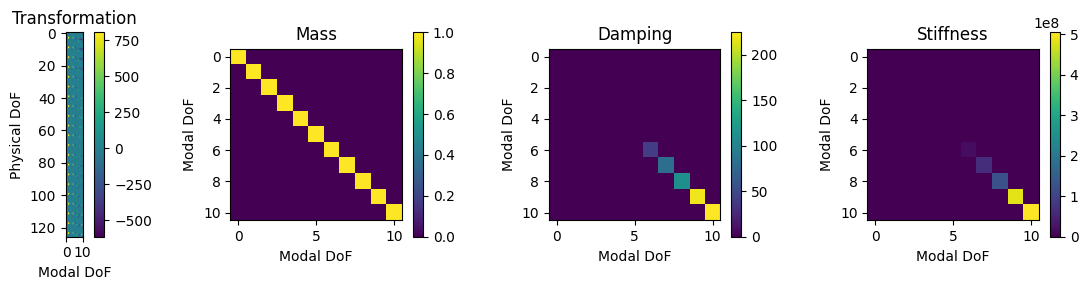

In [61]:
# Plot the modal system matrices
fig,ax = plt.subplots(1,4,num='Modal System Matrices',figsize=(12,3))
# Transformation
timg = ax[0].imshow(modal_system.transformation)
ax[0].set_title('Transformation')
ax[0].set_ylabel('Physical DoF')
ax[0].set_xlabel('Modal DoF')
plt.colorbar(timg,ax=ax[0])
# Mass
mimg = ax[1].imshow(modal_system.mass)
ax[1].set_title('Mass')
ax[1].set_ylabel('Modal DoF')
ax[1].set_xlabel('Modal DoF')
plt.colorbar(mimg,ax=ax[1])
# Damping
dimg = ax[2].imshow(modal_system.damping)
ax[2].set_title('Damping')
ax[2].set_ylabel('Modal DoF')
ax[2].set_xlabel('Modal DoF')
plt.colorbar(dimg,ax=ax[2])
# Stiffness
simg = ax[3].imshow(modal_system.stiffness)
ax[3].set_title('Stiffness')
ax[3].set_ylabel('Modal DoF')
ax[3].set_xlabel('Modal DoF')
plt.colorbar(simg,ax=ax[3])
fig.tight_layout()

We can see that the mass, stiffness, and
damping matrices of ``modal_system`` are now the modal mass, modal stiffness,
and modal damping matrices.  SDynPy also tracks the transformation between internal
degrees of freedom and physical degrees of freedom, which in this case is the
mode shape matrix $\mathbf{\Phi}$, which transforms modal degrees of freedom $\mathbf{q}$
to physical degrees of freedom $\mathbf{x}$ by the well-known modal
transformation

$$\mathbf{x} = \mathbf{\Phi}\mathbf{q}$$

We can see that the coordinates of the original ``system`` and ``modal_system``
are identical, meaning the same physical degrees of freedom exist in each.

In [62]:
np.all(system.coordinate == modal_system.coordinate)

np.True_

Because SDynPy tracks the transformation between internal and physical degrees
of freedom and applies it when necessary, the reduced ``modal_system`` can be
utilized identically to the original ``system`` consisting of physical degrees
of freedom.  For example, we can compute the eigensolution of ``modal_system``
and find that it produces the exact same modes as the original shapes.  The
transformation is automatically applied to the mode shape matrix to produce
shapes at the physical degrees of freedom.

In [63]:
modal_system.eigensolution()

   Index,  Frequency,    Damping,     # DoFs
    (0,),     0.0000,    0.0000%,        126
    (1,),     0.0000,    0.0000%,        126
    (2,),     0.0000,    0.0000%,        126
    (3,),     0.0000,    0.0000%,        126
    (4,),     0.0000,    0.0000%,        126
    (5,),     0.0000,    0.0000%,        126
    (6,),   648.5603,    0.5000%,        126
    (7,),  1297.1207,    0.5000%,        126
    (8,),  1787.8068,    0.5000%,        126
    (9,),  3504.9762,    0.5000%,        126
   (10,),  3575.6135,    0.5000%,        126

The modal system is useful because it can give approximately the same results
as the physical system (at least over the bandwidth of interest) with
significantly less computational cost.  Rather than performing computations on
a coupled, 126-degree-of-freedom system, we can instead perform computations on
an uncoupled, 11-degree-of-freedom system, and then apply a simple
transformation to convert the results back to physical degrees of freedom.

## Data in SDynPy

Data in SDynPy is stored as subclasses of the
[`NDDataArray`](xref:api#sdynpy.core.sdynpy_data.NDDataArray) object, which
represents all types of data in SDynPy (time histories, frequency response
functions, power spectral density arrays, etc.).  Functionality for specific
data types are stored in their respective subclasses.  For example, time history
signals are stored in
[`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) objects
and frequency response functions are stored in
[`TransferFunctionArray`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray)
objects.  

To create a
[`NDDataArray`](xref:api#sdynpy.core.sdynpy_data.NDDataArray) object, can will
utilize the
[`data_array`](xref:api#sdynpy.core.sdynpy_data.data_array) function.  This
function accepts a type specifier defined by the
[`FunctionTypes`](xref:api#sdynpy.core.sdynpy_data.FunctionTypes) enumeration.
Alternatively, users may use one of the many helper functions to create a specific
type of data.  For example, the [`time_history_array`](xref:api#sdynpy.core.sdynpy_data.time_history_array)
function will create a [`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) object.
Thesse functions will accept the abscissa (independent variable, e.g., frequency or time),
the ordinate (dependent variable, e.g., acceleration or force), the coordinate
(degree of freedom information for the signal), as well as up to five comments.
For example, we can construct a set of sine waves with different amplitudes

In [66]:
times = np.arange(100)/100
amplitudes = np.array([1,2])
# Use broadcasting to compute the signals
signal = amplitudes[:,np.newaxis]*np.sin(2*np.pi*5*times)
coordinates = sdpy.coordinate_array(
    string_array=['101X+','101Y-'])[:,np.newaxis]

time_history = sdpy.time_history_array(
    abscissa = times,
    ordinate = signal,
    coordinate = coordinates)

There are numerous function types defined in SDynPy.  Referencing the
[`sdpy.data`](xref:api#sdynpy.core.sdynpy_data) module will show the different
subclasses available.

Let's take this time to explore of the
[`NDDataArray`](xref:api#sdynpy.core.sdynpy_data.NDDataArray) class before moving
on.  First, let's examine the fields available by looking at the object's
``dtype``.

In [67]:
time_history.dtype

dtype([('abscissa', '<f8', (100,)), ('ordinate', '<f8', (100,)), ('comment1', '<U80'), ('comment2', '<U80'), ('comment3', '<U80'), ('comment4', '<U80'), ('comment5', '<U80'), ('coordinate', [('node', '<u8'), ('direction', 'i1')], (1,))])

The ``abscissa`` field consists of the independent variable, which in the case
of this time history, is the time value at each step.  Different function types
will have different abscissa data types.  For example, a spectral quantity may
have frequency lines as its abscissa.  The ``ordinate`` field consists of the
dependant variable.  For a time history, this is a real quantity, but for a
frequency-domain function such as a frequency response function, this may be a
complex value.  Both ``abscissa`` and ``ordinate`` have a shape of ``(100,)``, which
is the length of the time signal.  Like the
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray),
there are five fields available for comments, which store string data
up to 80 characters which can be used to store any data the user feels is
relevant to the analysis.  Finally, the ``coordinate`` field stores degree of 
freedom data as
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
objects, and thus has the same data type as
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray).
Different function types will have different shaped ``coordinate`` fields.
For example, a time history only has one degree of freedom associated with each
signal, so its shape is ``(1,)``.  Note, however that this makes the coordinate
field for the entire array ``(2,1)``, which is why the new axis needed to be
added to the coordinates ``coordinates`` variable in the previous code block.

In [68]:
time_history.shape

(2,)

In [69]:
time_history.coordinate.shape

(2, 1)

Other types of functions may have differently-shaped ``coordinate`` fields.
For example, a frequency response function will generally have a response
coordinate and a reference coordinate for each entry in the matrix, so it will
have a ``coordinate`` field of shape ``(2,)``.

There are many ways to visualize data in SDynPy, but the simplest is generally
to call the 
[`plot`](xref:api#sdynpy.core.sdynpy_data.NDDataArray.plot) method of the
[`NDDataArray`](xref:api#sdynpy.core.sdynpy_data.NDDataArray) object.
This will produce a plot window with the signals displayed in it.  This is more
useful for smaller datasets.  The plots produced by this method can get quite
busy if many signals are plotted.

<Axes: >

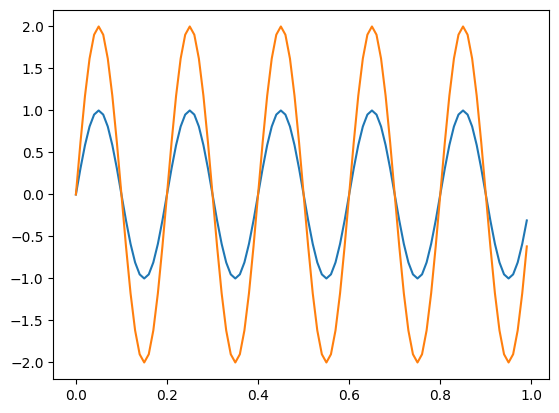

In [70]:
time_history.plot()

## Integrating Equations of Motion to Produce Time Data

While [`NDDataArray`](xref:api#sdynpy.core.sdynpy_data.NDDataArray) objects can
be created manually, many functions and methods in SDynPy will return various
data.  One common operation is to integrate the equations of motion of a system
to create a simulated time response to an imposed excitation or an imposed
initial condition.  The
[`time_integrate`](xref:api#sdynpy.core.sdynpy_system.System.time_integrate)
method of the [`System`](xref:api#sdynpy.core.sdynpy_system.System) class can be
used to integrate the dynamic system to produce time responses.  We will
demonstrate this analysis in this section.

### Generating an Excitation Signal

When setting up the time integration, we must consider the excitation that will
be applied to the [`System`](xref:api#sdynpy.core.sdynpy_system.System), as well 
as the initial conditions.  For this case, we will consider the system starting
at rest.  We will excite the structure with a pair of perpendicular random
vibration signals at the beam tip.  We can easily create these signals using
SDynPy's [`sdpy.generator`](xref:api#sdynpy.signal_processing.sdynpy_generator)
sub-module.  This contains functions to produce common signals used in
structural dynamics such as
[`sine`](xref:api#sdynpy.signal_processing.sdynpy_generator.sine),
[`chirp`](xref:api#sdynpy.signal_processing.sdynpy_generator.chirp),
[`pseudorandom`](xref:api#sdynpy.signal_processing.sdynpy_generator.pseudorandom),
[`random`](xref:api#sdynpy.signal_processing.sdynpy_generator.random),
[`burst_random`](xref:api#sdynpy.signal_processing.sdynpy_generator.burst_random),
and [`pulse`](xref:api#sdynpy.signal_processing.sdynpy_generator.pulse).  The functions
in the [`generator`](xref:api#sdynpy.signal_processing.sdynpy_generator) module will
generally be returned as basic NumPy arrays, which should generally be transformed
into [`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) objects
prior to being used.

We will look at the [`random`](xref:api#sdynpy.signal_processing.sdynpy_generator.random)
function to generate the input signals for this analysis.  We will set up some
initial signal processing parameters prior to generating the signal.

Text(0.5, 0, 'Time (s)')

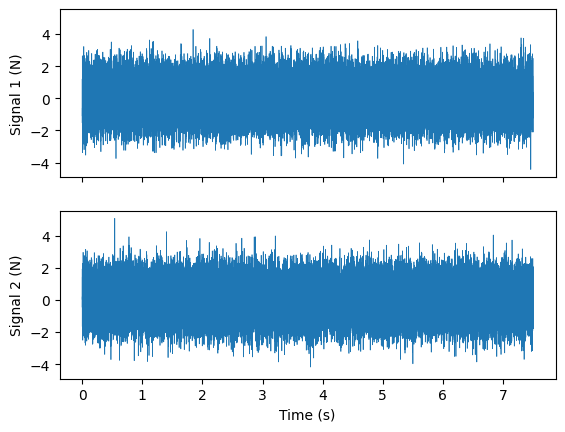

In [71]:
# Set up sampling parameters
signal_bandwidth = 4000 # Hz
sample_rate = signal_bandwidth*2
dt = 1/sample_rate
samples_per_frame = 2000
num_frames = 30
total_samples = samples_per_frame*num_frames
rms_level = 1.0
num_signals = 2

# Generate the signals
signals = sdpy.generator.random((num_signals,),total_samples,rms_level,dt)

# Plot the signals
fig,ax = plt.subplots(num_signals,1,num='Random Signals',
                        sharex=True,sharey=True)
ax[0].plot(np.arange(total_samples)*dt,signals[0],linewidth=0.5)
ax[0].set_ylabel('Signal 1 (N)')
ax[1].plot(np.arange(total_samples)*dt,signals[1],linewidth=0.5)
ax[1].set_ylabel('Signal 2 (N)')
ax[1].set_xlabel('Time (s)')

Rather than using the [`sdpy.generator`](xref:api#sdynpy.signal_processing.sdynpy_generator) module,
which generates NumPy arrays which are typically then transformed to 
[`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) objects, we could directly
generate [`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) objects using the class
methods [`pseudorandom_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.pseudorandom_signal),
[`random_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.random_signal),
[`sine_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.sine_signal),
[`burst_random_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.burst_random_signal),
[`chirp_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.chirp_signal),
[`pulse_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.pulse_signal),
[`haversine_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.haversine_signal), or
[`sine_sweep_signal`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.sine_sweep_signal).

### Performing the Time Integration
  
We can then apply the signal to the structure using the
[`time_integrate`](xref:api#sdynpy.core.sdynpy_system.System.time_integrate)
method of the [`System`](xref:api#sdynpy.core.sdynpy_system.System) class.
We need to chose which degrees of freedom to excite on the structure.  Recall
we can plot degrees of freedom using the
[`plot_coordinate`](xref:api#sdynpy.core.sdynpy_geometry.Geometry.plot_coordinate)
method of the [`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object.
By not specifying a set of coordinates to plot, it will simply plot all
translational coordinates.  Additionally, we can pass the optional keyword
argument ``label_dofs = True`` to tell the plotter to label the degrees of
freedom in the plot.


In [73]:
geometry.plot_coordinate(label_dofs=True,arrow_scale=0.02);

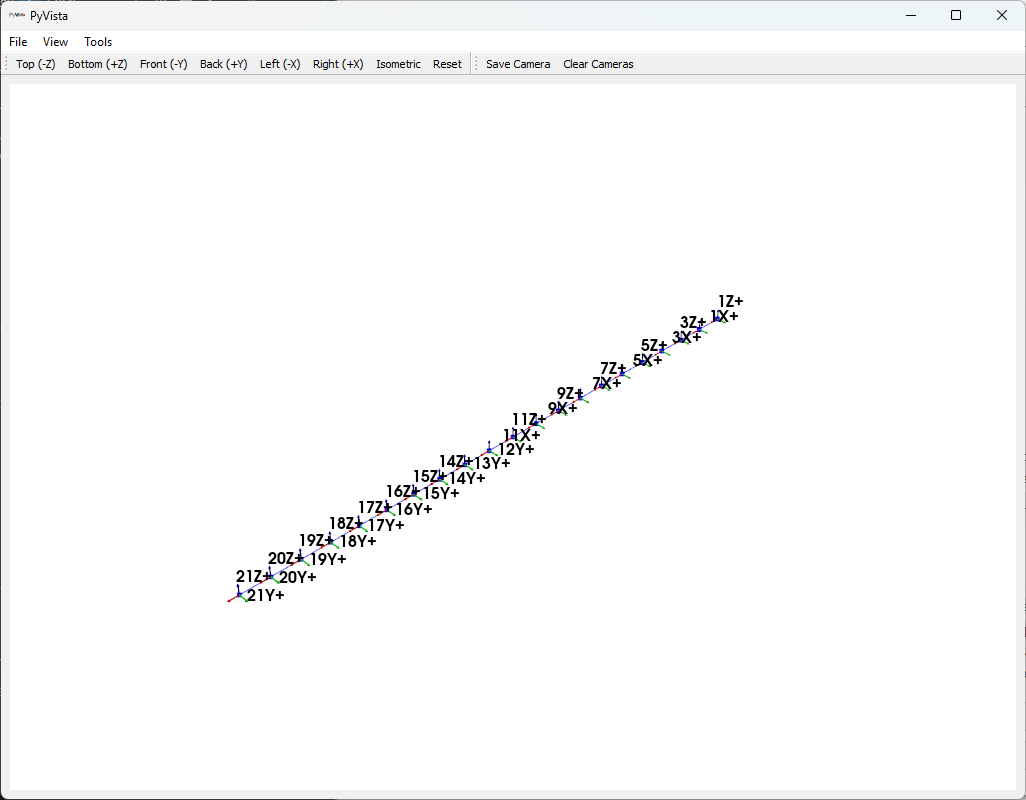

We will place the excitation forces at the tip of the beam in the two transverse
directions.  This corresponds to degrees of freedom ``21Y+`` and ``21Z+``.
We can define a new coordinate array using the 
[`sdpy.coordinate_array`](xref:api#sdynpy.core.sdynpy_coordinate.coordinate_array)
function.  This function can define new 
[`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
objects in multiple ways.  In this case, we will provide it the ``string_array``
keyword argument, and pass the coordinates that we desire in as strings.
Alternatively, they could also be passed in as separate nodes and directions,
which is useful for longer coordinate arrays.

In [75]:
excitation_dofs = sdpy.coordinate_array(
    string_array = ['21Y+','21Z+'])
    
geometry.plot_coordinate(excitation_dofs,label_dofs=True,arrow_scale=0.05);

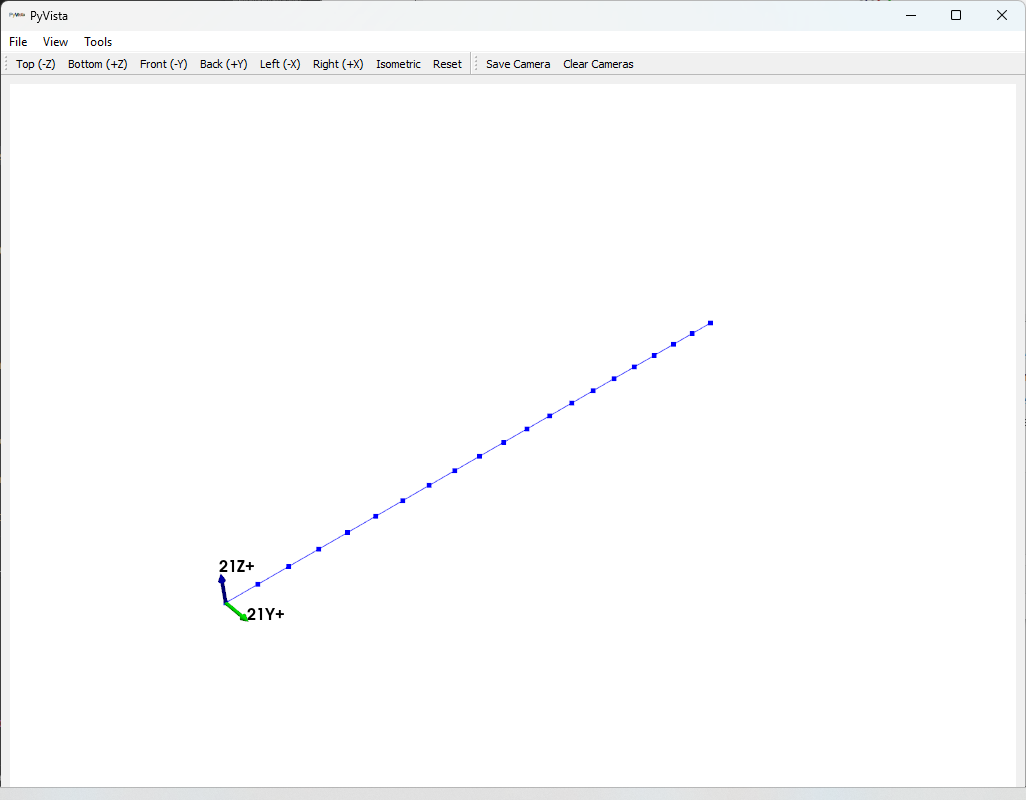

We might also specify the degrees of freedom at which we would like responses.
One could argue that it is quite difficult to measure rotations of a structure,
so we could construct our simulation such that it only returns the translational
degrees of freedom.  We can easily get a list of all translational degrees of
freedom using the 
[`sdpy.coordinate.from_nodelist`](xref:api#sdynpy.core.sdynpy_coordinate.from_nodelist)
function, which accepts a list of nodes and returns translational degrees of
freedom (by default, though can be modified) at each node in the list.  We can
generate this list of node identification numbers from our ``geometry`` object.


In [76]:
response_dofs = sdpy.coordinate.from_nodelist(geometry.node.id)
geometry.plot_coordinate(response_dofs,label_dofs=True,arrow_scale=0.025);

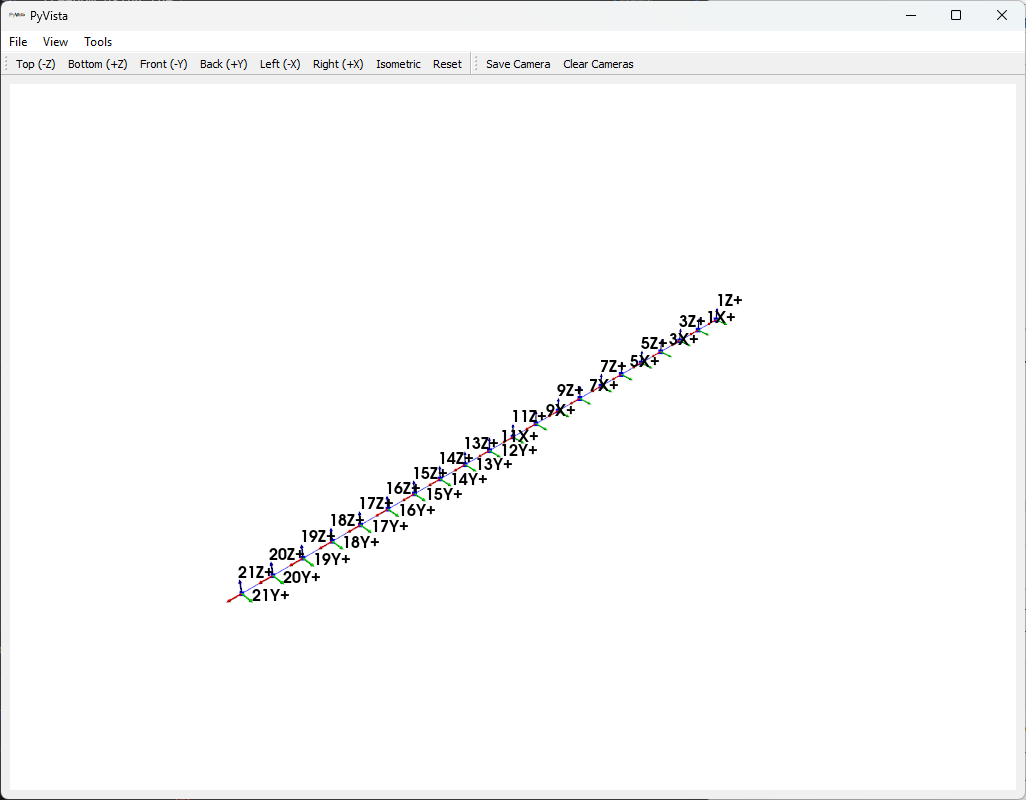

We can then integrate equations of motion for the system using the
[`time_integrate`](xref:api#sdynpy.core.sdynpy_system.System.time_integrate)
method of the [`System`](xref:api#sdynpy.core.sdynpy_system.System).  Note
that SDynPy allows users to select response degrees of freedom that are
displacements, velocities, or accelerations.  These are specified by a
dictionary with keys being the displacement derivative and
values being a [`CoordinateArray`](xref:api#sdynpy.core.sdynpy_coordinate.CoordinateArray)
specifying the degrees of freedom desired with that derivative.  For example,
a key of 2 denotes the second derivative of displacement, which will be an
acceleration.

In [77]:
abscissa = np.arange(total_samples)*dt
forces = sdpy.time_history_array(abscissa,signals,excitation_dofs[:,np.newaxis])
response_dict = {2:response_dofs}

responses = modal_system.time_integrate(
    forces, response_dict,
    integration_oversample = 10)

The ``integration_oversample`` keyword determines the degree of oversampling
that occurs in the integration.  The defined forces used a sample rate of
8000 Hz, so an oversample value of 10 will result in an integration time step
of 80000 steps per second of integration time.  One must be wary of using this
keyword argument, as it relies on zero-padding the Fourier Transform of the
signal, which is not an appropriate approach to oversample certain functions.
For example, if the excitation is a ramp, this zero-padding will produce
strange end effects.  If such a signal is used as the excitation, it is
recommended to simply generate the signal such that it is already oversampled,
and not use the ``integration_oversample`` argument of this function.
Note also that the
`scipy.signal.lsim <https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html>`_
function is used to perform the integration, so a factor of 10x is generally
sufficient for integration accuracy due to the linear system assumption.

Let's investigate the output of the
[`time_integrate`](xref:api#sdynpy.core.sdynpy_system.System.time_integrate)
method.  The output ``responses`` was produced in addition to the 
constructed ``forces`` time history.

In [78]:
responses

TimeHistoryArray with shape 63 and 60000 elements per function

In [79]:
forces

TimeHistoryArray with shape 2 and 60000 elements per function

Here we see that there are 63 response signals, and 2 force signals.
Here is an example where using the basic
[`plot`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray.plot) method of the 
[`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) object
may be unsatisfactory, as too many lines will be plotted on the figure.  Instead
we will use the interactive 2D plotter
[`GUIPlot`](xref:api#sdynpy.core.sdynpy_data.GUIPlot), which will allow us to
interactively chose which signals to show.

In [82]:
gp = sdpy.GUIPlot(responses);

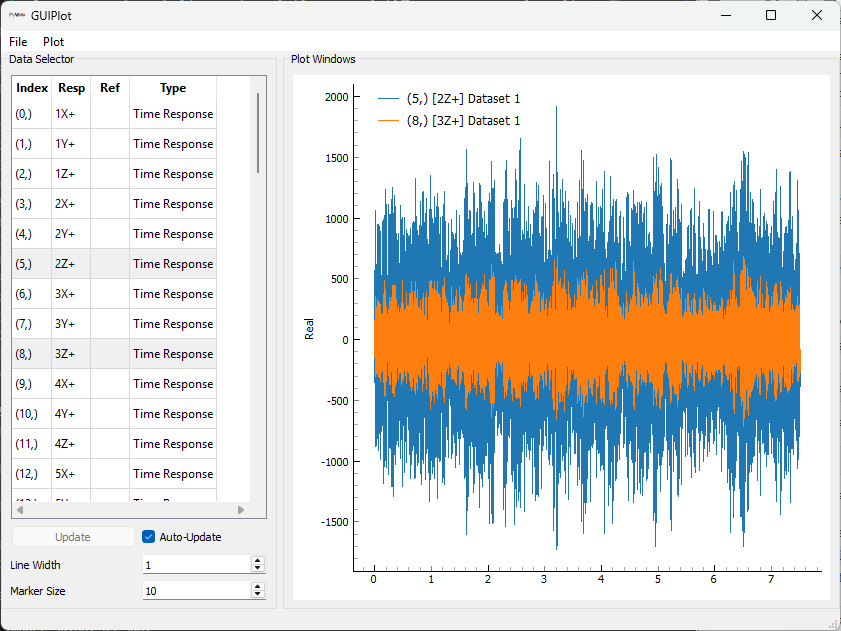

:::{warning} Disappearing Windows
Users may find that their interactive windows may immediately disappear upon creation.  The cause of this is often Python's garbage collector.  Python detects when a given piece of memory is no longer being used (e.g., the variable it was assigned to was deleted or the function in which it was defined ended).  If a user does not assign a window like [`GUIPlot`](xref:api#sdynpy.core.sdynpy_data.GUIPlot) to a variable, or if the variable it is assigned to is deleted, Python will "clean up" the memory, meaning the window will be closed.  Therefore, if a window is meant to stay open, a reference to it must be maintained.
:::

Another approach to visualizing the response of the system is to plot the response on the geometry.
Plotting displacements is perhaps more meaningful than plotting accelerations,
which we have computed here.  Nonetheless, it is valuable to show how this
can be done in SDynPy.  The
[`plot_transient`](xref:api#sdynpy.core.sdynpy_geometry.Geometry.plot_transient)
method of the [`Geometry`](xref:api#sdynpy.core.sdynpy_geometry.Geometry) object
can be used to show the time responses as displacements on the geometry.

In [83]:
geometry.plot_transient(responses,displacement_scale=0.003);

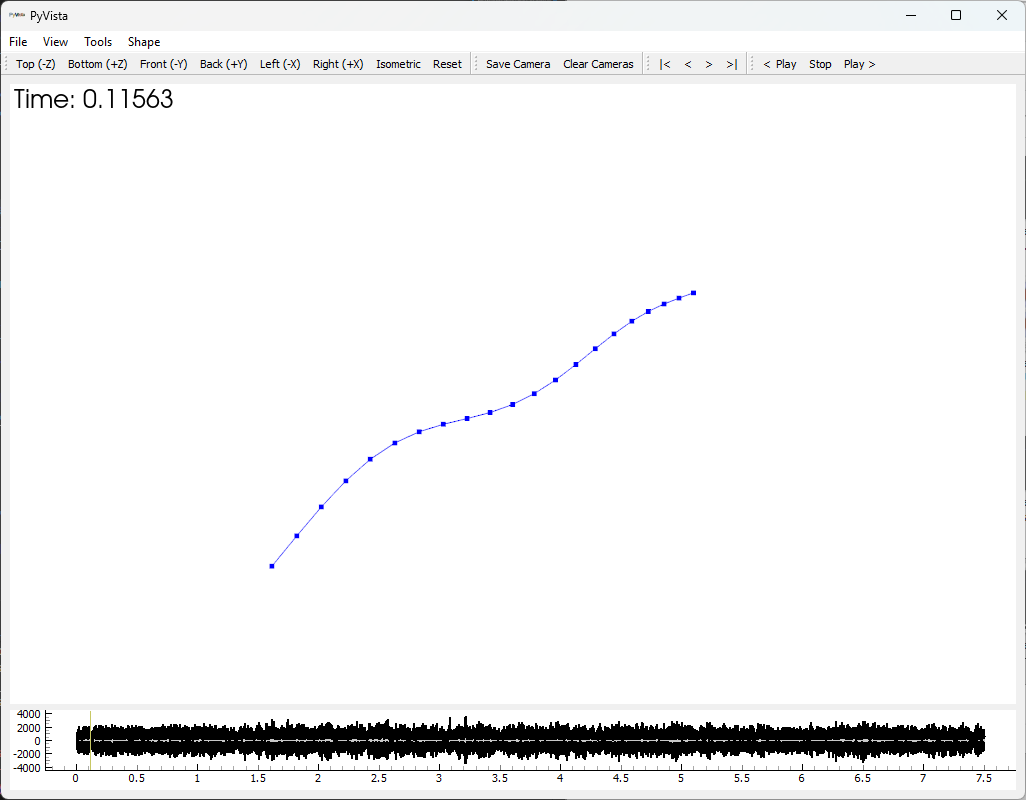

The transient plotter is similar to the mode shape plotter shown previously,
except instead of animating a single shape vibrating back and forth, it animates
a series of shapes one after another.  The user can adjust the current timestep
using the ``|<``, ``<``, ``>``, or ``>|`` buttons, or by sliding the cursor
across the time history representation at the bottom of the window.
The animation can be started by clicking one of the ``< Play`` or ``Play >``
buttons, which will plan the animation in reverse or forward, respectively.  The
animation can be stopped by clicking the ``Stop`` button.  The ``Shape`` menu
has options for scaling the displacement level and animation speed, as well as
setting the animation to loop.

## Computing Frequency Response Functions

SDynPy offers several approaches to compute frequency response functions.
These can be computed directly from a
[`System`](xref:api#sdynpy.core.sdynpy_system.System) object using its
[`frequency_response`](xref:api#sdynpy.core.sdynpy_system.System.frequency_response) method,
in which the dynamic stiffness matrix will be inverted and transformations
applied.  Frequency response functions can also be computed from
[`ShapeArray`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray) objects using its
[`compute_frf`](xref:api#sdynpy.core.sdynpy_shape.ShapeArray.compute_frf) method.
Finally, frequency response functions can be computed from
[`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) using
the
[`sdpy.TransferFunctionArray.from_time_data`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray.from_time_data)
function, or alternatively the
[`SignalProcessingGUI`](xref:api#sdynpy.modal.sdynpy_signal_processing_gui.SignalProcessingGUI).

### Code-based Frequency Response Function Computations

Let's set up some initial parameters to use to compute frequency response
functions.

In [84]:
df = 1/(dt*samples_per_frame)
frequency_lines = df*(np.arange(samples_per_frame)+1)

Then we can compute the frequency response functions with the approaches
described above.  First we will consider the code-based approaches.

In [85]:
# From the original undamped system
frfs_system = system.frequency_response(frequency_lines,
                                        response_dofs,
                                        excitation_dofs,
                                        displacement_derivative=2)
# From the reduced system with damping added
frfs_modal_system = modal_system.frequency_response(
    frequency_lines,
    response_dofs,
    excitation_dofs,
    displacement_derivative=2)
# From the eigensolution
frfs_shapes = shapes.compute_frf(frequency_lines,
                                 response_dofs,
                                 excitation_dofs,
                                 displacement_derivative=2)
# From time data
frfs_time = sdpy.TransferFunctionArray.from_time_data(
    forces, responses, samples_per_frame,
    overlap = 0.5, window = 'hann')

Before we go too much further, let's explore the
[`sdpy.TransferFunctionArray`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray)
object returned by these analyses.  First, by typing the variable name into
the console, we can see the shape of the
[`sdpy.TransferFunctionArray`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray)
as well as how many elements (frequency lines) are in each function.

In [86]:
frfs_system

TransferFunctionArray with shape 63 x 2 and 2000 elements per function

We can also examine the ``dtype`` of the 
[`sdpy.TransferFunctionArray`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray),
in particular comparing it to that of the
[`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray)

In [87]:
responses.dtype

dtype([('abscissa', '<f8', (60000,)), ('ordinate', '<f8', (60000,)), ('comment1', '<U80'), ('comment2', '<U80'), ('comment3', '<U80'), ('comment4', '<U80'), ('comment5', '<U80'), ('coordinate', [('node', '<u8'), ('direction', 'i1')], (1,))])

In [88]:
frfs_system.dtype

dtype([('abscissa', '<f8', (2000,)), ('ordinate', '<c16', (2000,)), ('comment1', '<U80'), ('comment2', '<U80'), ('comment3', '<U80'), ('comment4', '<U80'), ('comment5', '<U80'), ('coordinate', [('node', '<u8'), ('direction', 'i1')], (2,))])

Because both the
[`sdpy.TransferFunctionArray`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray)
``frfs_system`` and the 
[`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) ``responses``
are subclasses of the base [`NDDataArray`](xref:api#sdynpy.core.sdynpy_data.NDDataArray)
class, which represents all data in SDynPy, they will have the same fields.
However, the shapes and data types of the fields are different.  We see that the
``ordinate`` field of the
[`TimeHistoryArray`](xref:api#sdynpy.core.sdynpy_data.TimeHistoryArray) object
is a floating point number ``f8``, whereas the ``ordinate`` field of the 
[`sdpy.TransferFunctionArray`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray)
object is a complex number ``c16``, because in general, frequency response
functions are complex.  Additionally, we see that the the ``coordinate`` field
now no longer has shape ``(1,)``, but now has shape ``(2,)``.  This is because
there are two degrees of freedom associated with each entry in the frequency
response function matrix, a response coordinate and a reference coordinate.

In each of the frequency response functions we have computed, there are
63 responses and 2 forces, meaning a total of 126 frequency response
functions have been generated.  Rather than comparing all of these functions,
we will just compare the drive point frequency response functions.  This can
be easily selected by identifying the functions where the response coordinate
is equal to the reference coordinate (allowing for a difference in sign to occur
between the two).

In [90]:
drive_frfs_system = frfs_system[
    np.where(
        abs(frfs_system.response_coordinate)
        ==
        abs(frfs_system.reference_coordinate))]
        
drive_frfs_modal_system = frfs_modal_system[
    np.where(
        abs(frfs_modal_system.response_coordinate)
        ==
        abs(frfs_modal_system.reference_coordinate))]
        
drive_frfs_shapes = frfs_shapes[
    np.where(
        abs(frfs_shapes.response_coordinate)
        ==
        abs(frfs_shapes.reference_coordinate))]
        
drive_frfs_time = frfs_time[
    np.where(
        abs(frfs_time.response_coordinate)
        ==
        abs(frfs_time.reference_coordinate))]

Alternatively, the [`get_drive_points`](xref:api#sdynpy.core.sdynpy_data.NDDataArray.get_drive_points) method can be used.

In [89]:
drive_frfs_system = frfs_system.get_drive_points()
drive_frfs_modal_system = frfs_modal_system.get_drive_points()
drive_frfs_shapes = frfs_shapes.get_drive_points()
drive_frfs_time = frfs_time.get_drive_points()

We can then plot the drive point frequency response functions on the same plots
to compare them.

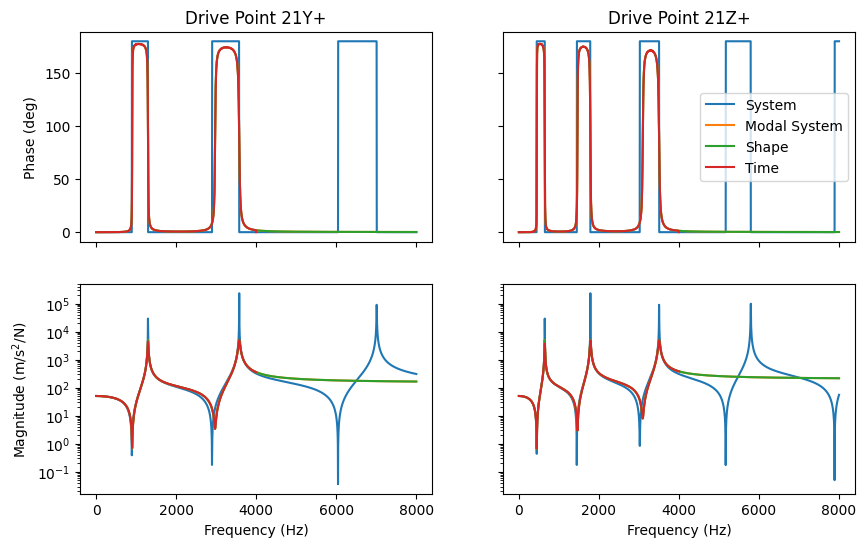

In [102]:
fig,ax = plt.subplots(2,2,sharex=True,sharey='row',figsize=(10,6))
for index,a in enumerate(ax.T):
    for frf in [
        drive_frfs_system,
        drive_frfs_modal_system,
        drive_frfs_shapes,
        drive_frfs_time]:
        a[0].plot(frf[index].abscissa,np.angle(frf[index].ordinate)*180/np.pi)
        a[1].plot(frf[index].abscissa,np.abs(frf[index].ordinate))
        a[1].set_yscale('log')
    a[1].set_xlabel('Frequency (Hz)')
    a[0].set_title(f"Drive Point {frf[index].response_coordinate.string_array()}")
ax[0,0].set_ylabel('Phase (deg)')
ax[1,0].set_ylabel('Magnitude (m/s$^2$/N)')
ax[0,1].legend(['System','Modal System','Shape','Time']);

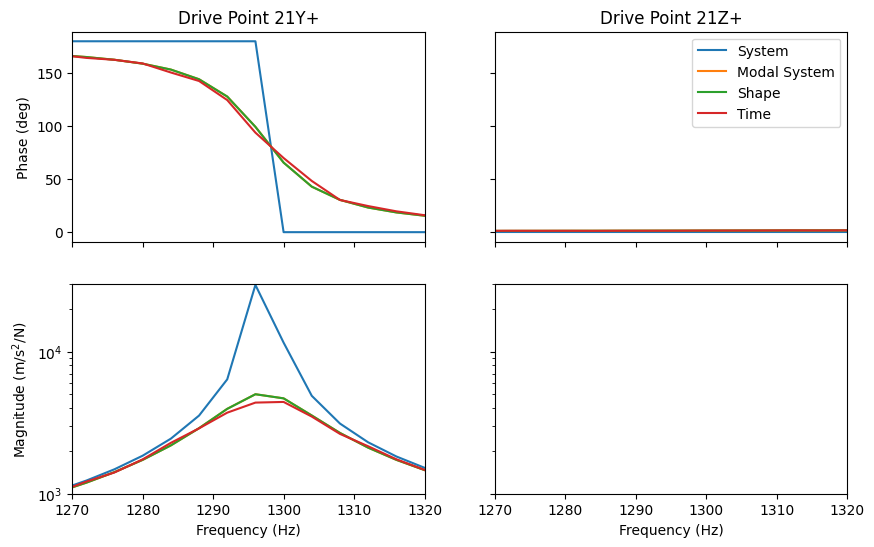

In [106]:
for a in ax.flatten():
    a.set_xlim([1270,1320])
for a in ax[1]:
    a.set_ylim([1e3,3e4])
fig

The most obvious difference between the four plots is in the ``System`` plot.
This original system, derived from a finite element model, had no damping
associated with it.  Therefore the peak is very sharp (indeed, infinitely sharp
if we had plotted with infinite frequency resolution) compared to the other
three where we had added 0.5% modal damping.  The ``Modal System`` and ``Shape``
derived frequency response functions are nominally identical due to them being
constructed from nominally identical data.  Finally, the ``Time`` curve is slightly
more blunt than the ``Shape`` or ``Modal System`` curves due to the artificial
damping added to the system from the Hann window applied during the frequency
response function computation.

If users would like to compare all frequency response functions rather than just
the drive points, the [`GUIPlot`](xref:api#sdynpy.core.sdynpy_data.GUIPlot) is 
again helpful.  Two data sets can be passed simultaneously into the class
to allow for comparisons of large datasets to be performed interactively.
SDynPy by default plots frequency response functions as log magnitude and phase.
However, the complex plotting and logarithmic scaling of the axes can be modified
in the ``Plot`` menu.

In [108]:
gp = sdpy.GUIPlot(
    System = frfs_system,
    Modal_System = frfs_modal_system,
    Shape = frfs_shapes,
    TIme = frfs_time)

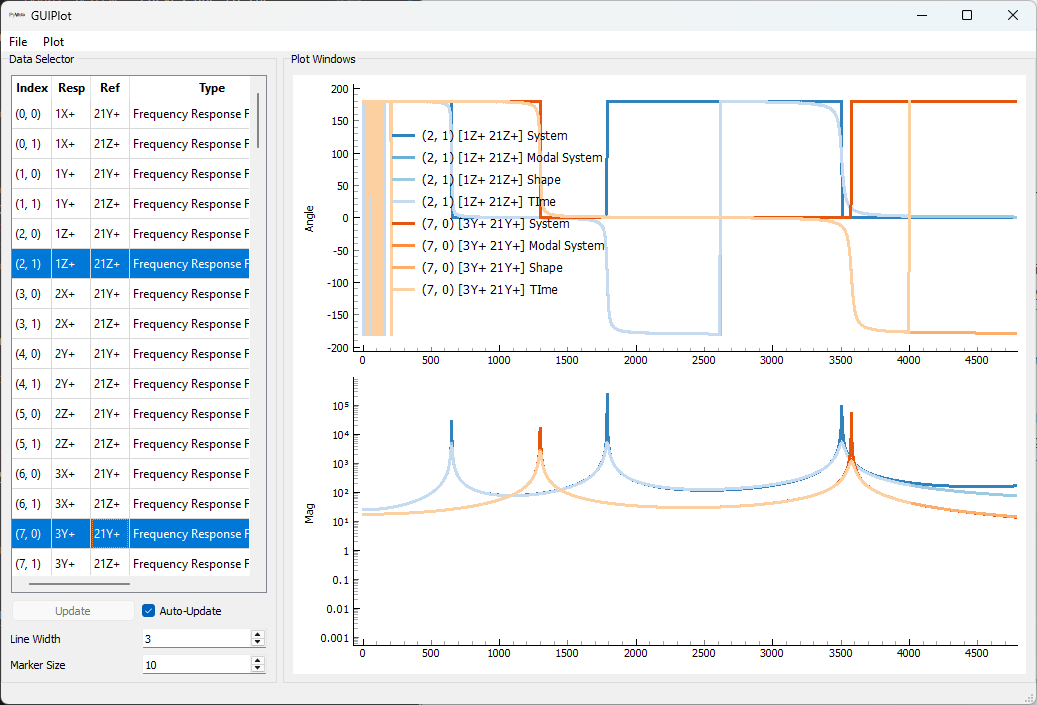

### Mode Indicator Functions

Another way to perform data reduction from a large number of frequency response
functions to an overall view of the system is to compute mode indicator functions.
Most popular are the Complex Mode Indicator Function (CMIF), the Normal Mode Indicator
Function (NMIF), and the Multi-Mode Indicator Function (MMIF).  One may also hear
of the QMIF, which is a variant of the CMIF that is computed using only the
imaginary part of the frequency response function (or real part when considering
velocity/force frequency response functions).

SDynPy can compute the mode indicator functions using the
[`compute_cmif`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray.compute_cmif),
[`compute_nmif`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray.compute_nmif),
and
[`compute_mmif`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray.compute_mmif)
methods of the
[`sdpy.TransferFunctionArray`](xref:api#sdynpy.core.sdynpy_data.TransferFunctionArray)
object.  See their respective documentation for additional arguments that 
can be passed to these functions.

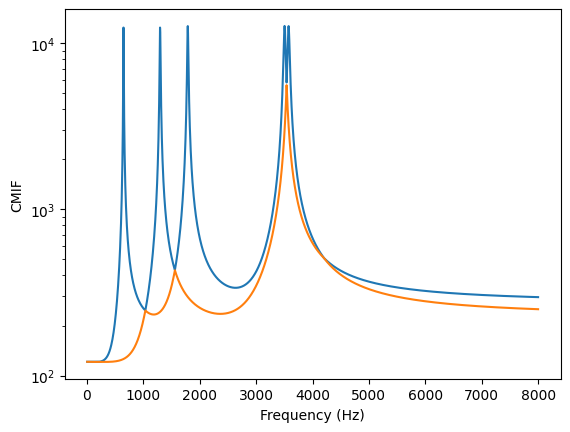

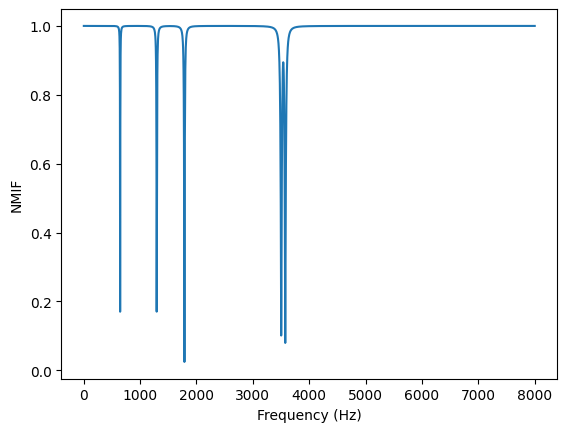

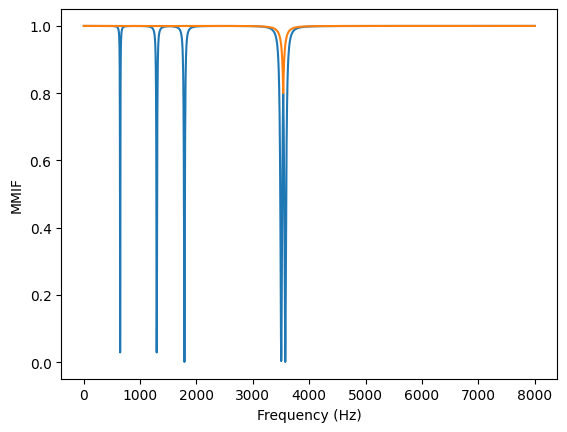

In [111]:
# CMIF
ax = frfs_shapes.compute_cmif().plot()
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('CMIF')
ax.set_yscale('log')
# NMIF
ax = frfs_shapes.compute_nmif().plot()
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('NMIF')
# MMIF
ax = frfs_shapes.compute_mmif().plot()
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('MMIF');

### Graphical Frequency Response Function Computation

While code-based frequency response function computations are nice in that they
can be automated very easily, some users may prefer a more graphical approach.
The [`SignalProcessingGUI`](xref:api#sdynpy.modal.sdynpy_signal_processing_gui.SignalProcessingGUI)
provides a way to do this.  We pass it all of our time histories (references and
responses) and then a window appears which provides various signal processing
parameters that can be selected.